# Day9: Agenda

- Pandas: pivot_table
- DB access: DB API
- Visualization
    - matplotlib
    - seaborn

In [1]:
import pandas as pd

In [2]:
mpg = pd.read_csv('data/auto-mpg.csv')
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


In [4]:
# Average hp over the years for all regions of origin
mpg.groupby(['yr', 'origin']).hp.mean().unstack()

origin,Asia,Europe,US
yr,,,
70,91.500000,86.200000,166.954545
71,79.250000,74.000000,119.842105
72,93.800000,79.600000,138.777778
73,98.500000,81.857143,146.620690
74,72.500000,74.166667,112.142857
75,80.250000,89.500000,108.700000
76,76.500000,87.625000,110.500000
77,81.166667,81.000000,118.388889
78,79.250000,99.166667,107.272727


In [5]:
mpg.pivot(index='yr', columns='origin', values='hp')

ValueError: Index contains duplicate entries, cannot reshape

In [6]:
mpg.pivot_table(index='yr', columns='origin', values='hp', aggfunc='mean')

origin,Asia,Europe,US
yr,,,
70,91.500000,86.200000,166.954545
71,79.250000,74.000000,119.842105
72,93.800000,79.600000,138.777778
73,98.500000,81.857143,146.620690
74,72.500000,74.166667,112.142857
75,80.250000,89.500000,108.700000
76,76.500000,87.625000,110.500000
77,81.166667,81.000000,118.388889
78,79.250000,99.166667,107.272727


In [8]:
# max weights over the years and for all regions
mpg.pivot_table(index='yr', columns='origin', values='weight', aggfunc='max')

origin,Asia,Europe,US
yr,,,
70,2372,2672,4732
71,2228,2123,5140
72,2506,2979,4633
73,2807,2868,4997
74,2489,2300,4699
75,2702,2957,4668
76,2930,3820,4380
77,2815,2600,4335
78,2560,3410,4080


In [9]:
# max weights over the years and for all regions
mpg.pivot_table(index='yr', columns='origin', values='weight', aggfunc=['min', 'mean', 'max'])

min                      mean                             max         \
origin  Asia Europe    US         Asia       Europe           US  Asia Europe   
yr                                                                              
70      2130   1835  2587  2251.000000  2309.200000  3716.500000  2372   2672   
71      1613   1834  1955  1936.000000  2024.000000  3472.947368  2228   2123   
72      2100   2189  2126  2300.400000  2573.200000  3682.666667  2506   2979   
73      2124   1867  2310  2397.250000  2335.714286  3821.448276  2807   2868   
74      1649   1963  2125  2053.000000  2139.333333  3548.214286  2489   2300   
75      1795   1937  2592  2303.250000  2571.166667  3533.200000  2702   2957   
76      1795   1825  2035  2217.500000  2611.000000  3405.409091  2930   3820   
77      1945   1825  2051  2295.833333  2138.750000  3422.000000  2815   2600   
78      1800   1985  1800  2221.250000  2691.666667  3141.136364  2560   3410   
79      1975   1925  1915  1997.500000  2693.750000  3210.217391  2020   3530   
80      1850   1845  2120  2290.307692  2412.125000  2808.666667  2910   3250   
81      1755   2190  1875  2269.166667  2860.000000  2695.000000  2930   3230   
82      1965   1980  2125  2132.777778  2055.000000  2616.842105  2665   2130   

              
origin    US  
yr            
70      4732  
71      5140  
72      4633  
73      4997  
74      4699  
75      4668  
76      4380  
77      4335  
78      4080  
79      4360  
80      3381  
81      3725  
82      3015

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


In [10]:
gm = pd.read_csv('data/gapminder_tidy.csv')
gm

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
...,...,...,...,...,...,...,...,...
10106,Åland,2002,NaN,81.800,26257.0,NaN,NaN,Europe & Central Asia
10107,Åland,2003,NaN,80.630,26347.0,NaN,NaN,Europe & Central Asia
10108,Åland,2004,NaN,79.880,26530.0,NaN,NaN,Europe & Central Asia
10109,Åland,2005,NaN,80.000,26766.0,NaN,NaN,Europe & Central Asia


In [15]:
# Average population over the years and over regions
pop = gm.pivot_table(values='population', index='Year', columns='region', aggfunc='mean')
pop

region,America,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
Year,,,,,,
1964,1.155489e+07,3.470839e+07,1.370303e+07,5.623595e+06,7.813424e+07,5082021.84
1965,1.178945e+07,3.544432e+07,1.384776e+07,5.778541e+06,7.989590e+07,5209470.06
1966,1.202083e+07,3.628661e+07,1.398209e+07,5.939812e+06,8.173262e+07,5341075.72
1967,1.224946e+07,3.722095e+07,1.410715e+07,6.107432e+06,8.364102e+07,5477101.78
1968,1.247674e+07,3.822070e+07,1.422564e+07,6.280693e+06,8.560559e+07,5617950.36
1969,1.270470e+07,3.924767e+07,1.434167e+07,6.458552e+06,8.760455e+07,5764136.08
1970,1.293492e+07,4.027052e+07,1.445822e+07,6.640459e+06,8.962409e+07,5916085.74
1971,1.316771e+07,4.128497e+07,1.457617e+07,6.826264e+06,9.165528e+07,6073961.12
1972,1.340292e+07,4.229140e+07,1.469454e+07,7.016866e+06,9.370770e+07,6237861.52


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113994e80>,
      dtype=object)

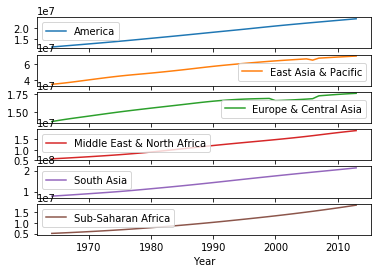

In [17]:
pop.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ff565e0>,
      dtype=object)

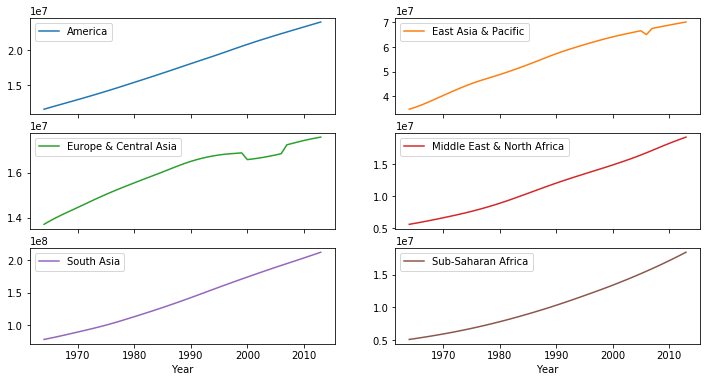

In [18]:
pop.plot(subplots=True, layout=(3,2), figsize=(12, 6))

## DB API

- Tabular Data
- Persistence: Disk
- Querying
- Multi-user
- Consistency
- Uniform Client Interface

In [19]:
import sqlite3

In [20]:
conn = sqlite3.connect('test.db')
conn

In [21]:
cur = conn.cursor()
cur

In [24]:
create_query = '''CREATE TABLE MPG
(mpg FLOAT, 
cyl INTEGER, 
displ FLOAT, 
hp INTEGER, 
weight INTEGER, 
accel FLOAT, 
yr INTEGER,
origin VARCHAR(10), 
name VARCHAR(50));
'''

In [30]:
cur.execute(create_query)

In [26]:
insert_query = '''
INSERT INTO MPG VALUES (18.0, 8, 307.0, 130, 3504, 12.0, 70, 'US', 'chevrolet chevelle malibu');
'''

In [31]:
cur.execute('select * from MPG')

In [32]:
cur.fetchall()

[('mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'),
 (18.0, 8, 307.0, 130, 3504, 12.0, 70, 'US', 'chevrolet chevelle malibu'),
 (15.0, 8, 350.0, 165, 3693, 11.5, 70, 'US', 'buick skylark 320'),
 (18.0, 8, 318.0, 150, 3436, 11.0, 70, 'US', 'plymouth satellite'),
 (16.0, 8, 304.0, 150, 3433, 12.0, 70, 'US', 'amc rebel sst'),
 (17.0, 8, 302.0, 140, 3449, 10.5, 70, 'US', 'ford torino'),
 (15.0, 8, 429.0, 198, 4341, 10.0, 70, 'US', 'ford galaxie 500'),
 (14.0, 8, 454.0, 220, 4354, 9.0, 70, 'US', 'chevrolet impala'),
 (14.0, 8, 440.0, 215, 4312, 8.5, 70, 'US', 'plymouth fury iii'),
 (14.0, 8, 455.0, 225, 4425, 10.0, 70, 'US', 'pontiac catalina'),
 (15.0, 8, 390.0, 190, 3850, 8.5, 70, 'US', 'amc ambassador dpl'),
 (15.0, 8, 383.0, 170, 3563, 10.0, 70, 'US', 'dodge challenger se'),
 (14.0, 8, 340.0, 160, 3609, 8.0, 70, 'US', "plymouth 'cuda 340"),
 (15.0, 8, 400.0, 150, 3761, 9.5, 70, 'US', 'chevrolet monte carlo'),
 (14.0, 8, 455.0, 225, 3086, 10.0, 70, 'US', 'buick est

In [35]:
# Count of total data
query = 'SELECT COUNT(*) FROM MPG;'
cur.execute(query)
# cur.fetchall()
r = cur.fetchone()

In [36]:
r[0]

393

In [47]:
# All US data for the year 70
query = '''SELECT * from MPG 
where origin = 'US' AND
yr = 71
'''
cur.execute(query)
# r = cur.fetchall()
# r

In [45]:
cur.fetchone()

(16.0, 6, 225.0, 105, 3439, 15.5, 71, 'US', 'plymouth satellite custom')

In [50]:
cur.fetchmany(10)

[]

In [46]:
for row in cur:
    print(row)

(17.0, 6, 250.0, 100, 3329, 15.5, 71, 'US', 'chevrolet chevelle malibu')
(19.0, 6, 250.0, 88, 3302, 15.5, 71, 'US', 'ford torino 500')
(18.0, 6, 232.0, 100, 3288, 15.5, 71, 'US', 'amc matador')
(14.0, 8, 350.0, 165, 4209, 12.0, 71, 'US', 'chevrolet impala')
(14.0, 8, 400.0, 175, 4464, 11.5, 71, 'US', 'pontiac catalina brougham')
(14.0, 8, 351.0, 153, 4154, 13.5, 71, 'US', 'ford galaxie 500')
(14.0, 8, 318.0, 150, 4096, 13.0, 71, 'US', 'plymouth fury iii')
(12.0, 8, 383.0, 180, 4955, 11.5, 71, 'US', 'dodge monaco (sw)')
(13.0, 8, 400.0, 170, 4746, 12.0, 71, 'US', 'ford country squire (sw)')
(13.0, 8, 400.0, 175, 5140, 12.0, 71, 'US', 'pontiac safari (sw)')
(18.0, 6, 258.0, 110, 2962, 13.5, 71, 'US', 'amc hornet sportabout (sw)')
(22.0, 4, 140.0, 72, 2408, 19.0, 71, 'US', 'chevrolet vega (sw)')
(19.0, 6, 250.0, 100, 3282, 15.0, 71, 'US', 'pontiac firebird')
(18.0, 6, 250.0, 88, 3139, 14.5, 71, 'US', 'ford mustang')
(23.0, 4, 122.0, 86, 2220, 14.0, 71, 'US', 'mercury capri 2000')
(26.0, 4

In [40]:
for row in r:
    print(row[0], row[-1])

28.0 chevrolet vega 2300
19.0 amc gremlin
16.0 plymouth satellite custom
17.0 chevrolet chevelle malibu
19.0 ford torino 500
18.0 amc matador
14.0 chevrolet impala
14.0 pontiac catalina brougham
14.0 ford galaxie 500
14.0 plymouth fury iii
12.0 dodge monaco (sw)
13.0 ford country squire (sw)
13.0 pontiac safari (sw)
18.0 amc hornet sportabout (sw)
22.0 chevrolet vega (sw)
19.0 pontiac firebird
18.0 ford mustang
23.0 mercury capri 2000
26.0 plymouth cricket


In [59]:
# 1. all data where hp is greater 150
query = 'select * from MPG where hp > 150;'
cur.execute(query).fetchall()

# 2. Count of data for Asia and Europe regions combined
query = '''select count(*) from mpg where origin = 'Asia' or origin = 'Europe'; '''
query = '''select count(*) from mpg where origin in ('Asia', 'Europe'); '''
cur.execute(query).fetchone()

# 3. Average hp over the years and for all regions
query = '''select yr, origin, round(avg(hp),2) from mpg
group by yr, origin;
'''
cur.execute(query)

In [60]:
for row in cur:
    print(row)

(70, 'Asia', 91.5)
(70, 'Europe', 86.2)
(70, 'US', 166.95)
(71, 'Asia', 79.25)
(71, 'Europe', 74.0)
(71, 'US', 119.84)
(72, 'Asia', 93.8)
(72, 'Europe', 79.6)
(72, 'US', 138.78)
(73, 'Asia', 98.5)
(73, 'Europe', 81.86)
(73, 'US', 146.62)
(74, 'Asia', 72.5)
(74, 'Europe', 74.17)
(74, 'US', 112.14)
(75, 'Asia', 80.25)
(75, 'Europe', 89.5)
(75, 'US', 108.7)
(76, 'Asia', 76.5)
(76, 'Europe', 87.63)
(76, 'US', 110.5)
(77, 'Asia', 81.17)
(77, 'Europe', 81.0)
(77, 'US', 118.39)
(78, 'Asia', 79.25)
(78, 'Europe', 99.17)
(78, 'US', 107.27)
(79, 'Asia', 65.0)
(79, 'Europe', 72.0)
(79, 'US', 109.43)
(80, 'Asia', 78.85)
(80, 'Europe', 66.75)
(80, 'US', 88.83)
(81, 'Asia', 78.33)
(81, 'Europe', 76.67)
(81, 'US', 84.54)
(82, 'Asia', 74.0)
(82, 'Europe', 63.0)
(82, 'US', 86.95)
('yr', 'origin', 0.0)


In [51]:
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger
